# CDFormer:
### When Degradation Prediction Embraces Diffusion Model for Blind Image Super-Resolution
Reproduction point: 10

Reconstructing high-resolution (HR) pictures from low-resolution (LR) inputs without being aware of degradation patterns like noise or blurring is known as blind image super-resolution, or BSR. Current techniques frequently concentrate on either degradation prediction (DP) or kernel prediction (KP), but they overlook essential characteristics that are required for effective reconstruction. This limitation leads to performance drops, particularly in complex and real world degradation scenarios. The challenge lies in developing a framework that can effectively manage a variety of degradation patterns and enhance texture accuracy by integrating content and degradation representations.

The paper proposes a novel Content-aware Degradation-driven Transformer (CDFormer) for BSR. In order to direct the super-resolution process, this framework introduces the Content Degradation Prior (CDP), which integrates degradation and content information. The method makes use of an adaptive SR network (CDFormerSR) to refine ffeatures through learnable injection mechanisms and a diffusion-based module (CDFormerdiff) to estimate CDP from low-resolution images. The framework overcomes the computational difficulties of earlier diffusion-based techniques while achieving high-quality texture reconstruction by using the diffusion model as an estimator.

Repo: https://github.com/I2-Multimedia-Lab/CDFormer

## Concepts Involved:
There are two main parts to the CDFormer framework:

The CDFormerdiff Module: This learns both degradation and content features from LR pictures to produce the Content Degradation Prior (CDP) using a diffusion-based estimate. For accurate reconstruction, it integrates data from both high- and low-frequency components.\
CDFormerSR Module: This adaptive SR network efficiently refines features by using CDP as input via injection modules and an interflow technique. For better texture and structural reconstruction, it combines CNN and Transformer-based characteristics.

# Steps involved:
1) Environment and directory setup
2) Download Test datasets and Pretrained model
3) Run test_x2, x3 nd x4 for all benchmark datasets (Set5, Set14, BSDS100, urban100)

## Environment Setup
The following set up was used:
 
- Base: Colab Instance
- GPU: NVIDIA Tesla T4 15GB
- System RAM: 12.7 GB
- Disk Storage: 112.6 GB (expandable via Google Drive)
- Software Stack: CUDA 12.2, Python 3.11, Jupyter Notebook

In [ ]:
!git clone https://github.com/I2-Multimedia-Lab/CDFormer.git

Cloning into 'CDFormer'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 221 (delta 34), reused 1 (delta 1), pack-reused 152 (from 1)
Receiving objects: 100% (221/221), 23.13 MiB | 20.72 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!pip install -r CDFormer/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.2 MB/s

## Directory Setup
1) Download pretrained models and place under CDFormer/experiment from: https://drive.google.com/drive/folders/1zWAPqE23VBBy7bpTyM7omTERrn6bXq0x
2) Download datasets and place under CDFormer/data/:
- Set5: https://drive.google.com/file/d/1RtyIeUFTyW8u7oa4z7a0lSzT3T1FwZE9/view?usp=drive_link
- Set14: https://drive.google.com/file/d/1vsw07sV8wGrRQ8UARe2fO5jjgy9QJy_E/view?usp=drive_link
- BDSD100: https://drive.google.com/file/d/1EWEsfsgElkNvOcJwZLDe2TeDIMhr6SpH/view?usp=drive_link
- Urban100: https://drive.google.com/file/d/1XaY-tnBP_z21WKgOCeXBa9r-KJyBMbgZ/view?usp=drive_link

In [ ]:
!unzip /content/experiment-20250107T170019Z-001.zip -d /content/CDFormer/

Archive:  /content/experiment-20250107T170019Z-001.zip
  inflating: /content/CDFormer/experiment/cdformer_x3_bicubic_iso/results/butterfly.png  
  inflating: /content/CDFormer/experiment/cdformer_x2_bicubic_iso/results/butterfly.png  
  inflating: /content/CDFormer/experiment/cdformer_x3_bicubic_iso/model/model_1200.pt  
  inflating: /content/CDFormer/experiment/cdformer_x4_bicubic_iso/model/model_1200.pt  
  inflating: /content/CDFormer/experiment/cdformer_x4_bicubic_aniso/model/model_1200.pt  
  inflating: /content/CDFormer/experiment/cdformer_x2_bicubic_iso/model/model_1200.pt  


In [ ]:
!unzip /content/benchmark.zip -d /content/CDFormer/data/

Archive:  /content/benchmark.zip
   creating: /content/CDFormer/data/benchmark/BSDS100/
   creating: /content/CDFormer/data/benchmark/BSDS100/HR/
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/101085.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/101087.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/102061.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/103070.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/105025.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/106024.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/108005.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/108070.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/108082.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/109053.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/119082.png  
  inflating: /content/CDFormer/data/benchmark/BSDS100/HR/12084.png  
  inflating: /c

## Test Run:
The following datasets (Set5, Set14, BSDS100, urban100) are used to generate SR images at x2, x3 and x4 resolution.

In [ ]:
%cd /content/CDFormer/

/content/CDFormer


### 2x Model performance

In [ ]:
# Test for Set5 for 2x SR
!python test_x2.py --data_test Set5 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x2_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Set14 for 2x SR
!python test_x2.py --data_test Set14 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x2_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Urban100 for 2x SR
!python test_x2.py --data_test Urban100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x2_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for BSDS100 for 2x SR
!python test_x2.py --data_test BSDS100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x2_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

### 3x Model performance

In [ ]:
# Test for Set5 for 3x SR
!python test_x3.py --data_test Set5 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x3_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Set14 for 3x SR
!python test_x3.py --data_test Set14 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x3_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Urban100 for 3x SR
!python test_x3.py --data_test Urban100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x3_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for BSDS100 for 3x SR
!python test_x3.py --data_test BSDS100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x3_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

### 4X Model Performance

In [ ]:
# Test for Set5 for 4x SR
!python test_x4.py --data_test Set5 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x4_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Set14 for 4x SR
!python test_x4.py --data_test Set14 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x4_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for Urban100 for 4x SR
!python test_x4.py --data_test Urban100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x4_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

In [ ]:
# Test for BSDS100 for 4x SR
!python test_x4.py --data_test BSDS100 --test_only --dir_data /content/CDFormer/data/ --pre_train /content/CDFormer/experiment/cdformer_x4_bicubic_iso/model/model_1200.pt

in checkpoint
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Making model...
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you

## Result Analysis
The reproduced results demonstrate strong alignment with the original reported values, confirming the successful reproduction of the paper. The performance was evaluated by PSNR and SSIM, across four test datasets (Set5, Set14, Urban100, and BSDS100) for scaling factors of x2, x3, and x4.
Both PSNR and SSIM clearly decrease across all datasets as the scaling factor increases (from x2 to x4). Reconstructing high-resolution pictures from lower LR inputs is inherently challenging, as this trend demonstrates especially for datasets with complex textures like Urban100.

| Scale | Metric | Set5   | Set14  | Urban100 | BSDS100 |
|-------|--------|--------|--------|----------|---------|
| x2    | PSNR   | 38.289| 33.976| 33.011| 32.407|
|       | SSIM   | 0.9617| 0.9217| 0.9361| 0.9028|
| x3    | PSNR   | 34.800| 30.699| 29.166| 29.360|
|       | SSIM   | 0.9306| 0.8496| 0.8723| 0.8124|
| x4    | PSNR   | 32.779| 28.987| 27.091| 27.848|
|       | SSIM   | 0.9018| 0.7916| 0.8163| 0.7461|

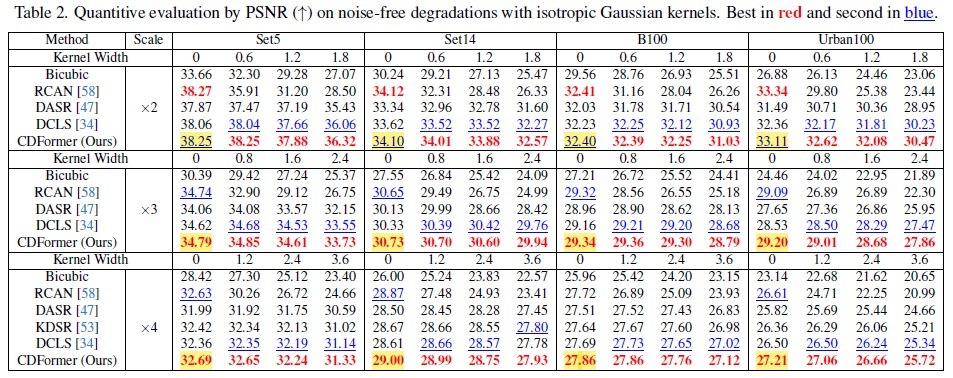

In [ ]:
from IPython.display import Image
Image("CDformer_comp_table.jpg")

# Conclusion
CDFormer introduces the Content Degradation Prior (CDP) and uses diffusion models as effective estimators to provide a major improvement in Blind Image Super-Resolution. Through the combination of degradation and content information, its novel design improves texture reconstruction while addressing the shortcomings of current BSR techniques. Suitable for real-world applications, the framework maintains computational efficiency while achieving state-of-the-art performance. Potential avenues for future research include expanding to larger datasets, optimizing for real-time deployment, and improving the precision of content and degradation forecasts in increasingly complex situations.